## Acessando e realizando o download de imagens CBERS

### Sincronização com o colab

In [1]:
import os
from getpass import getpass

!apt-get install git -qq
!git config --global user.email "ctotti@id.uff.br"  #  email do GitHub
!git config --global user.name "ctotti"             # nome de usuário no GitHub

token = getpass('Digite seu token: ')  # O token não será visível ao digitar
os.environ['GITHUB_TOKEN'] = token

!git clone https://${GITHUB_TOKEN}@github.com/ctotti/INPE_Disciplinas.git

Digite seu token: ··········
Cloning into 'INPE_Disciplinas'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 92 (delta 32), reused 64 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 33.52 MiB | 21.22 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
# Movendo arquivo para a pasta do repositório
!mv "/content/drive/MyDrive/Colab Notebooks/Vizualização_amostras.ipynb" /content/INPE_Disciplinas/Masters_Thesis/RF/Samples/

In [ ]:
!git pull origin main

# # Salve o notebook primeiro (se for .ipynb)
# !jupyter nbconvert --to script seu_arquivo.ipynb  # Converte para .py (opcional)

# Vá para a pasta do repositório
%cd /content/INPE_Disciplinas/Masters_Thesis/RF/Samples

# Adicione, faça commit e envie as alterações
!git add .
!git commit -m "Atualização automática do Colab"
!git push origin main  # ou "master" dependendo do seu branch

In [ ]:
ctotti/INPE_Disciplinas/tree/main/Masters_Thesis/RF

### Instalação e importação dos pacotes


In [ ]:
pip install cbers4asat -q

In [ ]:
pip install "cbers4asat[tools]" -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 25.7 MB/s eta 0:00:00


In [ ]:
from cbers4asat import Cbers4aAPI
from cbers4asat.tools import rgbn_composite
from cbers4asat import Collections as coll

import geopandas as gpd

import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt
from datetime import date
import os

### Área de interesse

In [ ]:
AOI = gpd.read_file("/content/drive/MyDrive/DISSERTAÇÃO/AHP/AOI/PAs_Assurini_dissolved.gpkg")

In [ ]:
# Extrair a primeira geometria do GeoDataFrame
polygon = AOI.geometry.iloc[0]  # Supondo que há apenas um polígono

# Se for um MultiPolígono, pode ser necessário converter
if polygon.geom_type == "MultiPolygon":
    polygon = polygon.convex_hull  # Simplifica para um único polígono

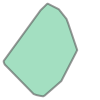

In [ ]:
polygon

### Inicializando biblioteca e consultando imagens

In [ ]:
# Inicializando a biblioteca
api = Cbers4aAPI('camila.andrade@inpe.br') # E-mail usado no login da plataforma https://www.dgi.inpe.br/catalogo/explore

In [ ]:
# Buscando metadados. Este exemplo utiliza o path row (órbita/ponto).
# Consulte a órbita/ponto: http://www.obt.inpe.br/OBT/assuntos/catalogo-cbers-amz-1
produtos = api.query(location=polygon,
                     initial_date=date(2024, 7, 27),
                     end_date=date(2024, 7, 27),
                     cloud=100,
                     limit=10,
                     collections=[coll.CBERS4A_WPM_L4_DN])

# Exibindo os resultados
print(produtos)

{'type': 'FeatureCollection', 'features': [{'stac_version': '0.9.0', 'stac_extensions': ['eo', 'query'], 'type': 'Feature', 'id': 'CBERS4A_WPM21511720240727', 'collection': 'CBERS4A_WPM_L4_DN', 'geometry': {'type': 'Polygon', 'coordinates': [[[-52.6331, -2.67168], [-52.6348, -3.71367], [-51.6252, -3.71497], [-51.6246, -2.67262], [-52.6331, -2.67168]]]}, 'bbox': [-52.6348, -3.71497, -51.6246, -2.67168], 'properties': {'datetime': '2024-07-27T14:02:38', 'path': 215, 'row': 117, 'satellite': 'CBERS4A', 'sensor': 'WPM', 'cloud_cover': 30.0, 'sync_loss': 0.0, 'eo:gsd': -1, 'eo:bands': [{'name': 'pan', 'common_name': 'pan'}, {'name': 'blue', 'common_name': 'blue'}, {'name': 'green', 'common_name': 'green'}, {'name': 'red', 'common_name': 'red'}, {'name': 'nir', 'common_name': 'nir'}]}, 'assets': {'thumbnail': {'href': 'https://www.dgi.inpe.br/datastore/TIFF/CBERS4A/2024_07/CBERS_4A_WPM_RAW_2024_07_27.13_59_26_ETC2/215_117_0/4_BC_UTM_WGS84/CBERS_4A_WPM_20240727_215_117.png', 'type': 'image/pn

In [ ]:
gdf = api.to_geodataframe(produtos)
gdf

,geometry,datetime,path,row,satellite,sensor,cloud_cover,id,bbox,collection,thumbnail
id,,,,,,,,,,,
CBERS4A_WPM21511720240727,"POLYGON ((-52.6331 -2.67168, -52.6348 -3.71367...",2024-07-27T14:02:38,215,117,CBERS4A,WPM,30.0,CBERS4A_WPM21511720240727,"[-52.6348, -3.71497, -51.6246, -2.67168]",CBERS4A_WPM_L4_DN,https://www.dgi.inpe.br/datastore/TIFF/CBERS4A...
CBERS4A_WPM21511820240727,"POLYGON ((-52.796 -3.46563, -52.7982 -4.50766,...",2024-07-27T14:02:51,215,118,CBERS4A,WPM,20.0,CBERS4A_WPM21511820240727,"[-52.7982, -4.50946, -51.7867, -3.46563]",CBERS4A_WPM_L4_DN,https://www.dgi.inpe.br/datastore/TIFF/CBERS4A...


In [ ]:
gdf.iloc[0]['id']
gdf.iloc[1]['id']

'CBERS4A_WPM21511820240727'

### Realizando download das imagens

In [ ]:
api.download(produtos,
             bands = ["red", "green", "blue", "nir", "pan"],
            #  threads=cpu_count(),
             outdir="/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS",
             with_folder=False)

## Abrindo imagens e gerando composição colorida (STACK)

In [ ]:
import os
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt

### Verificando imagens na pasta

In [ ]:
# Definir o caminho da pasta
caminho = "/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS"

# Listar todos os arquivos e subpastas
arquivos = os.listdir(caminho)

# Mostrar os arquivos
print("Arquivos na pasta:")
for arquivo in arquivos:
    print(arquivo)

Arquivos na pasta:
CBERS_4A_WPM_20240727_215_117_L4_BAND3.tif
CBERS_4A_WPM_20240727_215_117_L4_BAND2.tif
CBERS_4A_WPM_20240727_215_117_L4_BAND1.tif
CBERS_4A_WPM_20240727_215_117_L4_BAND4.tif
CBERS_4A_WPM_20240727_215_117_L4_BAND0.tif
CBERS_4A_WPM_20240727_215_118_L4_BAND3.tif
CBERS_4A_WPM_20240727_215_118_L4_BAND2.tif
CBERS_4A_WPM_20240727_215_118_L4_BAND1.tif
CBERS_4A_WPM_20240727_215_118_L4_BAND4.tif
CBERS_4A_WPM_20240727_215_118_L4_BAND0.tif
STACK
Pansharpened


### Definindo caminho de exportação da composição

In [ ]:
output_dir = os.path.join(caminho, "STACK")
os.makedirs(output_dir, exist_ok=True)  # Criar pasta de saída se não existir

In [ ]:
# Composite imagens 117
rgbn_composite(
    red = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_117_L4_BAND3.tif"),
    green = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_117_L4_BAND2.tif"),
    blue = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_117_L4_BAND1.tif"),
    # nir = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_117_L4_BAND4.tif"),
    filename = 'CBERS_4A_WPM_20240727_215_117_TRUE_COLOR_3BANDS.tif',
    outdir = output_dir
)

In [ ]:
# Composite imagens 118
rgbn_composite(
    red = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_118_L4_BAND3.tif"),
    green = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_118_L4_BAND2.tif"),
    blue = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_118_L4_BAND1.tif"),
    # nir = os.path.join(caminho, "CBERS_4A_WPM_20240727_215_118_L4_BAND4.tif"),
    filename = 'CBERS_4A_WPM_20240727_215_118_TRUE_COLOR_3BANDS.tif',
    outdir = output_dir
)

### Importando e visualizando composição colorida (STACK)

In [ ]:
r117_path = os.path.join(output_dir, 'CBERS_4A_WPM_20240727_215_117_TRUE_COLOR_3BANDS.tif')
r118_path = os.path.join(output_dir, 'CBERS_4A_WPM_20240727_215_118_TRUE_COLOR_3BANDS.tif')

r117 = rio.open(r117_path)
r118 = rio.open(r118_path)

In [ ]:
r118

<open DatasetReader name='/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/STACK/CBERS_4A_WPM_20240727_215_118_TRUE_COLOR_3BANDS.tif' mode='r'>

## Realizando Pansharpening

In [ ]:
from cbers4asat.tools import pansharpening

In [ ]:
# Definir caminhos
caminho_pan = "/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS"
pan_output_dir = os.path.join(caminho, "Pansharpened")
os.makedirs(pan_output_dir, exist_ok=True)  # Criar pasta de saída

In [ ]:
# Arquivos de entrada
pan_band_117_path = "/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/CBERS_4A_WPM_20240727_215_117_L4_BAND0.tif"
pan_band_118_path = "/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/CBERS_4A_WPM_20240727_215_118_L4_BAND0.tif"

# r117_path = os.path.join(output_dir, 'CBERS_4A_WPM_20240727_215_117_TRUE_COLOR.tif') # Composição 117
r117_path = '/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/STACK/CBERS_4A_WPM_20240727_215_117_TRUE_COLOR.tif'
r117 = rio.open(r117_path)

r118_path = os.path.join(output_dir, 'CBERS_4A_WPM_20240727_215_118_TRUE_COLOR.tif') # Composição 118
r118 = rio.open(r118_path)

In [ ]:
pansharpening(
    panchromatic="/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/CBERS_4A_WPM_20240727_215_117_L4_BAND0.tif",
    multispectral="/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/STACK/CBERS_4A_WPM_20240727_215_117_TRUE_COLOR_3BANDS.tif",
    filename="PANSHARP.tif",
    outdir="/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/Pansharpened",
)

In [ ]:
print(output_dir)
print(os.path.exists(output_dir))
print(r117_path)
print(os.path.exists(r117_path))
print(r117)

/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/STACK
True
/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/STACK/CBERS_4A_WPM_20240727_215_117_TRUE_COLOR.tif
True
<open DatasetReader name='/content/drive/MyDrive/DISSERTAÇÃO/RF/Rasters/CBERS/STACK/CBERS_4A_WPM_20240727_215_117_TRUE_COLOR.tif' mode='r'>
